In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import os

In [6]:
os.getcwd()

'c:\\Users\\varsh\\OneDrive\\Desktop\\GUVI\\Tennis project\\CROPS PROJECT'

In [7]:
data= pd.read_csv("FAOSTAT_data.csv")

In [8]:
data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure,NaN


In [ ]:
data.drop(data[data["Element"]=="Stocks"].index,axis=0,inplace=True)
# To remove rows from the Data dataframe where the Elements column has value as Stocks.

In [ ]:
# To fill missing 'Value' entries in rows where 'Element' is 'Area harvested'with mode of 'Values'

mode_area_harvested = data[data['Element'] == 'Area harvested']['Value'].mode()[0]
data.loc[(data['Element'] == 'Area harvested') & (data['Value'].isna()), 'Value'] = mode_area_harvested

In [12]:
# To fill the missing 'Value' entries in rows where 'Element' is 'Yield' with the mode of 'Value' for those rows.

mode_area_harvested = data[data['Element'] == 'Yield']['Value'].mode()[0]
data.loc[(data['Element'] == 'Yield') & (data['Value'].isna()), 'Value'] = mode_area_harvested

In [13]:
# To fill the missing 'Value' entries in rows where 'Element' is 'Production' with the mode of 'Value' for those rows.

mode_area_harvested = data[data['Element'] == 'Production']['Value'].mode()[0]
data.loc[(data['Element'] == 'Production') & (data['Value'].isna()), 'Value'] = mode_area_harvested

In [14]:
data.isna().sum()

Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code (CPC)          5
Item                     0
Year Code                0
Year                     0
Unit                     2
Value                  540
Flag                     2
Flag Description        11
Note                210759
dtype: int64

In [15]:
data.count()

Domain Code         215838
Domain              215838
Area Code (M49)     215838
Area                215838
Element Code        215838
Element             215838
Item Code (CPC)     215833
Item                215838
Year Code           215838
Year                215838
Unit                215836
Value               215298
Flag                215836
Flag Description    215827
Note                  5079
dtype: int64

In [16]:
# Drop note column
data.drop(columns="Note", inplace=True)

In [17]:
# Dropping year code column

data.drop(columns="Year Code", inplace=True)

In [18]:
#Dropping Flag Column

data.drop(columns="Flag", inplace=True)

In [19]:
# To drop Flag Description column

data.drop(columns="Flag Description", inplace=True)

In [20]:
#To display the unique values in the "Element" column of the 'data' DataFrame.

data["Element"].unique()

array(['Area harvested', 'Yield', 'Production',
       'Producing Animals/Slaughtered', 'Laying', 'Yield/Carcass Weight',
       'Milk Animals'], dtype=object)

In [21]:
# To drop the rows from the 'data' DataFrame where the 'Value' column has missing (NaN) values.

data.dropna(subset='Value',inplace=True)

In [ ]:
# To check the total number of missing (NaN) values in each column of the 'data' DataFrame after dropping rows.

data.isna().sum()

Domain Code        0
Domain             0
Area Code (M49)    0
Area               0
Element Code       0
Element            0
Item Code (CPC)    5
Item               0
Year               0
Unit               2
Value              0
dtype: int64

In [23]:
# To create new columns for each element in 'elements' by extracting 'Value' where the 'Element' matches, and setting other values to None.


elements = ['Area harvested', 'Yield', 'Stocks',
       'Producing Animals/Slaughtered', 'Laying', 'Yield/Carcass Weight',
       'Milk Animals','Production']

for element in elements:
    Tranformed_Columns = data['Element'] == element
    data[f'{element}_Value'] = data['Value'].where(Tranformed_Columns, None)

In [24]:
# Renaming columns in the 'data' DataFrame for clarity, 
# changing specific column names related to area, yield, and production.


data = data.rename(columns={"Area harvested_Value": "Area_Harvested_in_Hectares"})
data = data.rename(columns={"Yield_Value": "Yield_Value in kg/ha"})
data = data.rename(columns={"Production_Value": "Production in Hectares"})

In [25]:
# Dropping the "Element" column from the 'data' DataFrame.

data.drop("Element",axis = 1,inplace = True)

In [26]:
# Dropping the "Value" column from the 'data' DataFrame.
data.drop("Value",axis = 1,inplace = True)

In [27]:
# Dropping the "Unit" column from the 'data' DataFrame.

data.drop("Unit",axis = 1,inplace = True)

In [28]:
# Dropping the "Element Code" column from the 'data' DataFrame.

data.drop("Element Code",axis = 1,inplace = True)

In [29]:
# Displaying the first 25 rows of the 'data' DataFrame.

data.head(25)

,Domain Code,Domain,Area Code (M49),Area,Item Code (CPC),Item,Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Stocks_Value,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
0,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2019,29203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2019,NaN,1308.3,NaN,NaN,NaN,NaN,NaN,NaN
2,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38205.00
3,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2020,22134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2020,NaN,1775.9,NaN,NaN,NaN,NaN,NaN,NaN
5,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39307.00
6,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2021,36862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2021,NaN,1743.2,NaN,NaN,NaN,NaN,NaN,NaN
8,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64256.00
9,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2022,36462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Counting the number of non-null values in each column of the 'data' DataFrame.

data.count()

Domain Code                            215298
Domain                                 215298
Area Code (M49)                        215298
Area                                   215298
Item Code (CPC)                        215293
Item                                   215298
Year                                   215298
Area_Harvested_in_Hectares              50309
Yield_Value in kg/ha                    51566
Stocks_Value                                0
Producing Animals/Slaughtered_Value     17563
Laying_Value                             1063
Yield/Carcass Weight_Value               6307
Milk Animals_Value                       2108
Production in Hectares                  86382
dtype: int64

In [31]:
# Displaying the first 5 rows of the 'data' DataFrame.

data.head()

,Domain Code,Domain,Area Code (M49),Area,Item Code (CPC),Item,Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Stocks_Value,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
0,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2019,29203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2019,NaN,1308.3,NaN,NaN,NaN,NaN,NaN,NaN
2,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38205.0
3,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2020,22134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2020,NaN,1775.9,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Grouping the 'data' DataFrame by multiple columns and 
# aggregating specific columns using the sum function, 
# then displaying the first 25 rows of the grouped data.


grouped_crop_Dataframe = data.groupby(
    ['Domain', 'Area', 'Item','Item Code (CPC)', 'Year'], as_index=False
).agg({
    'Area_Harvested_in_Hectares': 'sum',  
    'Yield_Value in kg/ha': 'sum',  
    'Producing Animals/Slaughtered_Value': 'sum',  
    'Laying_Value': 'sum',  
    'Yield/Carcass Weight_Value': 'sum',  
    'Milk Animals_Value': 'sum',  
    'Production in Hectares': 'sum'  
})


grouped_crop_Dataframe.head(25)

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
0,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2019,29203.0,1308.3,0.0,0.0,0.0,0.0,38205.00
1,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2020,22134.0,1775.9,0.0,0.0,0.0,0.0,39307.00
2,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2021,36862.0,1743.2,0.0,0.0,0.0,0.0,64256.00
3,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2022,36462.0,1742.0,0.0,0.0,0.0,0.0,63515.00
4,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2023,37000.0,1810.8,0.0,0.0,0.0,0.0,67000.00
5,Crops and livestock products,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",1654,2019,25293.0,704.1,0.0,0.0,0.0,0.0,17807.76
6,Crops and livestock products,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",1654,2020,25558.0,703.0,0.0,0.0,0.0,0.0,17965.90
7,Crops and livestock products,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",1654,2021,25357.0,705.0,0.0,0.0,0.0,0.0,17876.49
8,Crops and livestock products,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",1654,2022,25403.0,704.0,0.0,0.0,0.0,0.0,17883.38
9,Crops and livestock products,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",1654,2023,25439.0,704.0,0.0,0.0,0.0,0.0,17908.59


In [33]:
# Calculate the mean of the target column
mean_production = grouped_crop_Dataframe['Production in Hectares'].mean()

# Calculate the standard deviation of the target column
std_production = grouped_crop_Dataframe['Production in Hectares'].std()

# Calculate the standard deviation percentage (coefficient of variation)
std_percentage = (std_production / mean_production) * 100

In [34]:
std_percentage

np.float64(1272.3949682667499)

In [35]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = grouped_crop_Dataframe['Production in Hectares'].quantile(0.25)
Q3 = grouped_crop_Dataframe['Production in Hectares'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = grouped_crop_Dataframe[(grouped_crop_Dataframe['Production in Hectares'] < lower_bound) | (grouped_crop_Dataframe['Production in Hectares'] > upper_bound)]

# Display results
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Outliers:")
print(outliers)

Lower bound: -126737.06
Upper bound: 212359.09999999998
Outliers:
                             Domain         Area                    Item  \
10     Crops and livestock products  Afghanistan                  Apples   
11     Crops and livestock products  Afghanistan                  Apples   
12     Crops and livestock products  Afghanistan                  Apples   
13     Crops and livestock products  Afghanistan                  Apples   
14     Crops and livestock products  Afghanistan                  Apples   
...                             ...          ...                     ...   
87068  Crops and livestock products     Zimbabwe  Unmanufactured tobacco   
87080  Crops and livestock products     Zimbabwe                   Wheat   
87081  Crops and livestock products     Zimbabwe                   Wheat   
87082  Crops and livestock products     Zimbabwe                   Wheat   
87083  Crops and livestock products     Zimbabwe                   Wheat   

      Item Code (CPC)

In [36]:
grouped_crop_Dataframe.head()

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
0,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2019,29203.0,1308.3,0.0,0.0,0.0,0.0,38205.0
1,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2020,22134.0,1775.9,0.0,0.0,0.0,0.0,39307.0
2,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2021,36862.0,1743.2,0.0,0.0,0.0,0.0,64256.0
3,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2022,36462.0,1742.0,0.0,0.0,0.0,0.0,63515.0
4,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2023,37000.0,1810.8,0.0,0.0,0.0,0.0,67000.0


In [37]:
grouped_crop_Dataframe[grouped_crop_Dataframe['Production in Hectares']==0.0]

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
108,Crops and livestock products,Afghanistan,Grapes,0,2021,0.0,10727.9,0.0,0.0,0.0,0.0,0.0
109,Crops and livestock products,Afghanistan,Grapes,1330,2019,89593.0,12422.0,0.0,0.0,0.0,0.0,0.0
194,Crops and livestock products,Afghanistan,Oranges,1323,2019,973.0,6172.8,0.0,0.0,0.0,0.0,0.0
411,Crops and livestock products,Albania,"Buffalo fat, unrendered",21513,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,Crops and livestock products,Albania,"Buffalo fat, unrendered",21513,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
86652,Crops and livestock products,Zimbabwe,Currants,1351.01,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86653,Crops and livestock products,Zimbabwe,Currants,1351.01,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86654,Crops and livestock products,Zimbabwe,Currants,1351.01,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86655,Crops and livestock products,Zimbabwe,Currants,1351.01,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Checking the total number of missing (NaN) values in each column of the 'grouped_crop_Dataframe'.

grouped_crop_Dataframe.isnull().sum()

Domain                                 0
Area                                   0
Item                                   0
Item Code (CPC)                        0
Year                                   0
Area_Harvested_in_Hectares             0
Yield_Value in kg/ha                   0
Producing Animals/Slaughtered_Value    0
Laying_Value                           0
Yield/Carcass Weight_Value             0
Milk Animals_Value                     0
Production in Hectares                 0
dtype: int64

In [39]:
grouped_crop_Dataframe.shape

(87097, 12)

In [40]:
grouped_crop_Dataframe.index

RangeIndex(start=0, stop=87097, step=1)

In [41]:
grouped_crop_Dataframe.columns

Index(['Domain', 'Area', 'Item', 'Item Code (CPC)', 'Year',
       'Area_Harvested_in_Hectares', 'Yield_Value in kg/ha',
       'Producing Animals/Slaughtered_Value', 'Laying_Value',
       'Yield/Carcass Weight_Value', 'Milk Animals_Value',
       'Production in Hectares'],
      dtype='object')

In [42]:
grouped_crop_Dataframe.dtypes

Domain                                  object
Area                                    object
Item                                    object
Item Code (CPC)                         object
Year                                     int64
Area_Harvested_in_Hectares             float64
Yield_Value in kg/ha                   float64
Producing Animals/Slaughtered_Value    float64
Laying_Value                           float64
Yield/Carcass Weight_Value             float64
Milk Animals_Value                     float64
Production in Hectares                 float64
dtype: object

In [43]:
grouped_crop_Dataframe['Year'].unique()

array([2019, 2020, 2021, 2022, 2023])

In [44]:
grouped_crop_Dataframe['Area'].nunique()

200

In [45]:
grouped_crop_Dataframe.nunique()

Domain                                     1
Area                                     200
Item                                     258
Item Code (CPC)                          259
Year                                       5
Area_Harvested_in_Hectares             21224
Yield_Value in kg/ha                   39535
Producing Animals/Slaughtered_Value     5649
Laying_Value                             862
Yield/Carcass Weight_Value              3018
Milk Animals_Value                      1998
Production in Hectares                 62431
dtype: int64

In [46]:
grouped_crop_Dataframe.count()

Domain                                 87097
Area                                   87097
Item                                   87097
Item Code (CPC)                        87097
Year                                   87097
Area_Harvested_in_Hectares             87097
Yield_Value in kg/ha                   87097
Producing Animals/Slaughtered_Value    87097
Laying_Value                           87097
Yield/Carcass Weight_Value             87097
Milk Animals_Value                     87097
Production in Hectares                 87097
dtype: int64

In [47]:
grouped_crop_Dataframe.value_counts()

Domain                        Area         Item                                                                       Item Code (CPC)  Year  Area_Harvested_in_Hectares  Yield_Value in kg/ha  Producing Animals/Slaughtered_Value  Laying_Value  Yield/Carcass Weight_Value  Milk Animals_Value  Production in Hectares
Crops and livestock products  Zimbabwe     Wine                                                                       24212.02         2019  0.0                         0.0                   0.0                                  0.0           0.0                         0.0                 0.00                      1
                              Afghanistan  Almonds, in shell                                                          1371             2019  29203.0                     1308.3                0.0                                  0.0           0.0                         0.0                 38205.00                  1
                                                   

In [48]:
grouped_crop_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87097 entries, 0 to 87096
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Domain                               87097 non-null  object 
 1   Area                                 87097 non-null  object 
 2   Item                                 87097 non-null  object 
 3   Item Code (CPC)                      87097 non-null  object 
 4   Year                                 87097 non-null  int64  
 5   Area_Harvested_in_Hectares           87097 non-null  float64
 6   Yield_Value in kg/ha                 87097 non-null  float64
 7   Producing Animals/Slaughtered_Value  87097 non-null  float64
 8   Laying_Value                         87097 non-null  float64
 9   Yield/Carcass Weight_Value           87097 non-null  float64
 10  Milk Animals_Value                   87097 non-null  float64
 11  Production in Hectares      

In [49]:
# for statistical visualizations
import seaborn as sns

In [ ]:
grouped_crop_Dataframe.head()

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
0,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2019,29203.0,1308.3,0.0,0.0,0.0,0.0,38205.0
1,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2020,22134.0,1775.9,0.0,0.0,0.0,0.0,39307.0
2,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2021,36862.0,1743.2,0.0,0.0,0.0,0.0,64256.0
3,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2022,36462.0,1742.0,0.0,0.0,0.0,0.0,63515.0
4,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2023,37000.0,1810.8,0.0,0.0,0.0,0.0,67000.0


In [52]:
import matplotlib.pyplot as plt

C:\Users\varsh\AppData\Local\Temp\ipykernel_24124\4234804333.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Area", y="Area_Harvested_in_Hectares", data=top_10_areas, palette="viridis")


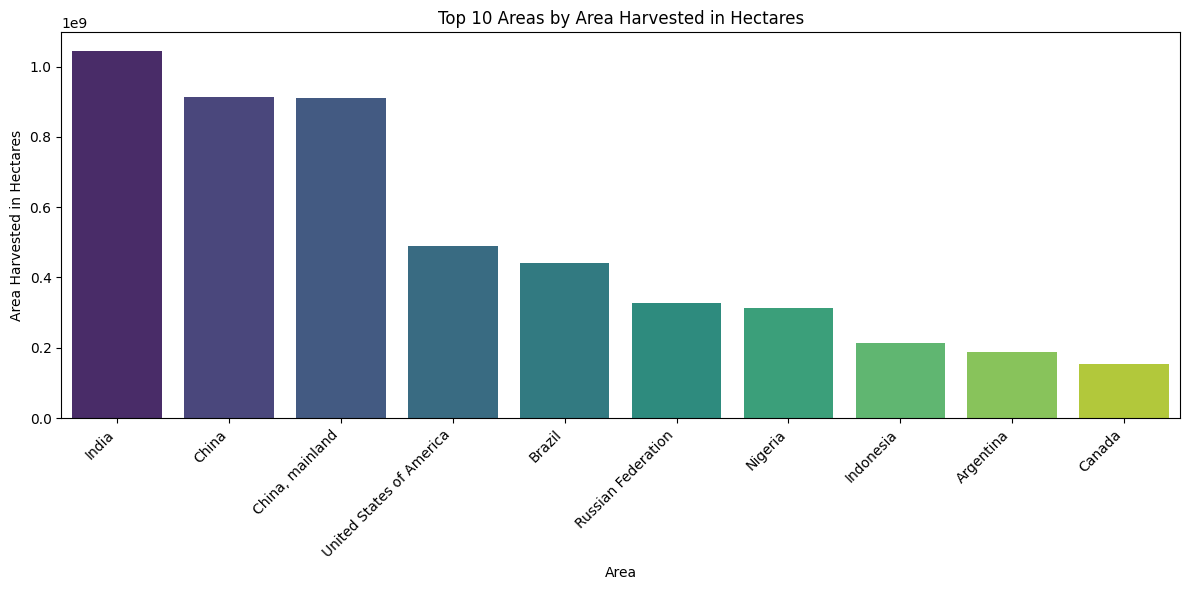

In [53]:
# Grouping the 'grouped_crop_Dataframe' by 'Area' and summing the values,
#  then plotting a barplot of the top 10 areas by "Area Harvested in Hectares"
#  with rotation of x-axis labels for better readability.


grouped_crop_DF = grouped_crop_Dataframe.groupby('Area', as_index=False).sum()

# Get the top 10 areas by 'Area_Harvested_in_Hectares'
top_10_areas = grouped_crop_DF.nlargest(10, 'Area_Harvested_in_Hectares')

# Plot the barplot with the top 10 areas
plt.figure(figsize=(12, 6))
sns.barplot(x="Area", y="Area_Harvested_in_Hectares", data=top_10_areas, palette="viridis")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Top 10 Areas by Area Harvested in Hectares")
plt.xlabel("Area")
plt.ylabel("Area Harvested in Hectares")
plt.tight_layout()
plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_24124\3779209961.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Area", y="Yield_Value in kg/ha", data=top_10_areas, palette="viridis")


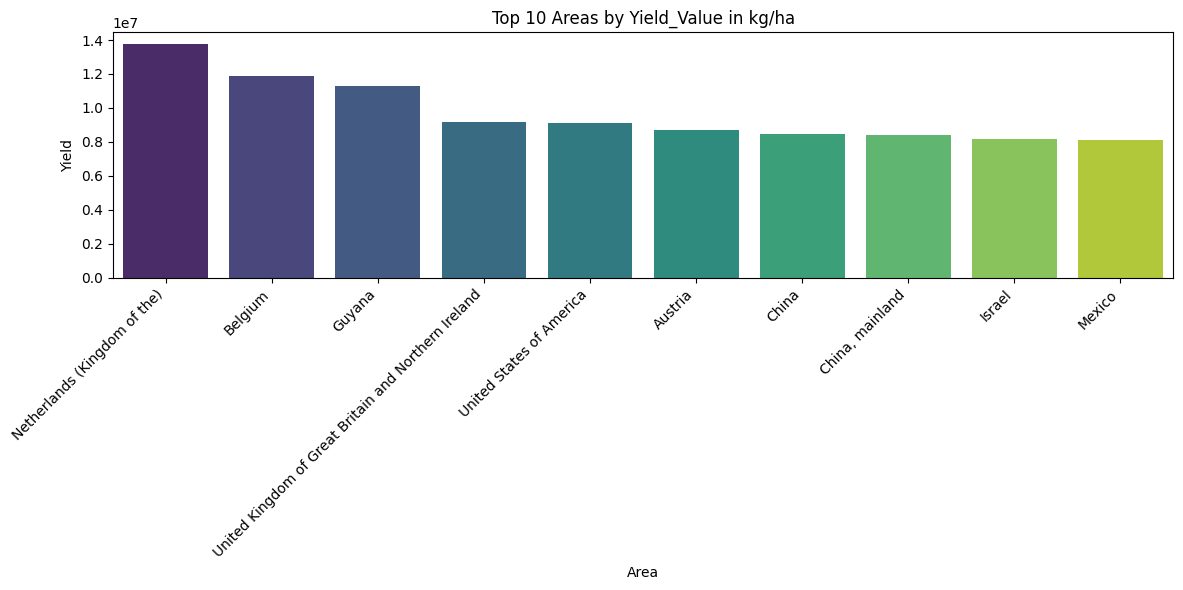

In [54]:
grouped_crop_DF = grouped_crop_Dataframe.groupby('Area', as_index=False).sum()

# Get the top 10 areas by 'Area_Harvested_in_Hectares'
top_10_areas = grouped_crop_DF.nlargest(10, 'Yield_Value in kg/ha')

# Plot the barplot with the top 10 areas
plt.figure(figsize=(12, 6))
sns.barplot(x="Area", y="Yield_Value in kg/ha", data=top_10_areas, palette="viridis")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Top 10 Areas by Yield_Value in kg/ha")
plt.xlabel("Area")
plt.ylabel("Yield")
plt.tight_layout()
plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_24124\1450005716.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Area", y="Production in Hectares", data=top_10_areas, palette="viridis")


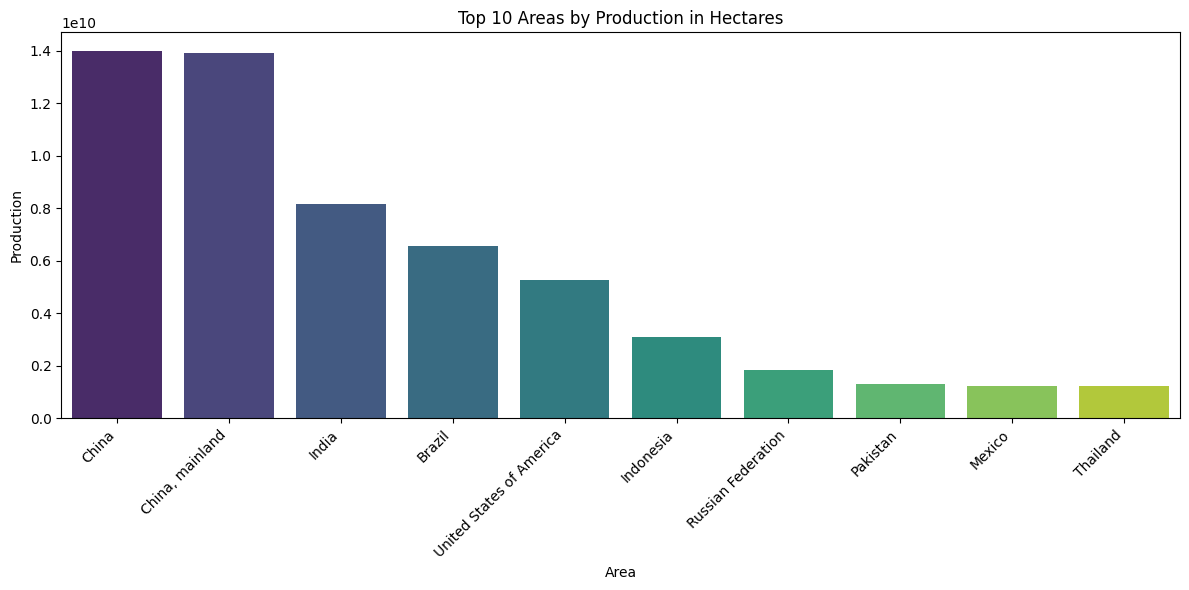

In [55]:
grouped_crop_DF = grouped_crop_Dataframe.groupby('Area', as_index=False).sum()

# Get the top 10 areas by 'Area_Harvested_in_Hectares'
top_10_areas = grouped_crop_DF.nlargest(10, 'Production in Hectares')

# Plot the barplot with the top 10 areas
plt.figure(figsize=(12, 6))
sns.barplot(x="Area", y="Production in Hectares", data=top_10_areas, palette="viridis")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Top 10 Areas by Production in Hectares")
plt.xlabel("Area")
plt.ylabel("Production")
plt.tight_layout()
plt.show()

In [56]:
grouped_crop_Dataframe.head()

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
0,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2019,29203.0,1308.3,0.0,0.0,0.0,0.0,38205.0
1,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2020,22134.0,1775.9,0.0,0.0,0.0,0.0,39307.0
2,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2021,36862.0,1743.2,0.0,0.0,0.0,0.0,64256.0
3,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2022,36462.0,1742.0,0.0,0.0,0.0,0.0,63515.0
4,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2023,37000.0,1810.8,0.0,0.0,0.0,0.0,67000.0


In [57]:
grouped_crop_Dataframe[grouped_crop_Dataframe["Production in Hectares"]==0.0]

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
108,Crops and livestock products,Afghanistan,Grapes,0,2021,0.0,10727.9,0.0,0.0,0.0,0.0,0.0
109,Crops and livestock products,Afghanistan,Grapes,1330,2019,89593.0,12422.0,0.0,0.0,0.0,0.0,0.0
194,Crops and livestock products,Afghanistan,Oranges,1323,2019,973.0,6172.8,0.0,0.0,0.0,0.0,0.0
411,Crops and livestock products,Albania,"Buffalo fat, unrendered",21513,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,Crops and livestock products,Albania,"Buffalo fat, unrendered",21513,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
86652,Crops and livestock products,Zimbabwe,Currants,1351.01,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86653,Crops and livestock products,Zimbabwe,Currants,1351.01,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86654,Crops and livestock products,Zimbabwe,Currants,1351.01,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86655,Crops and livestock products,Zimbabwe,Currants,1351.01,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
DF1=grouped_crop_Dataframe[grouped_crop_Dataframe["Production in Hectares"] != 0.0]

In [59]:
DF1

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
0,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2019,29203.0,1308.3,0.0,0.0,0.0,0.0,38205.00
1,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2020,22134.0,1775.9,0.0,0.0,0.0,0.0,39307.00
2,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2021,36862.0,1743.2,0.0,0.0,0.0,0.0,64256.00
3,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2022,36462.0,1742.0,0.0,0.0,0.0,0.0,63515.00
4,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2023,37000.0,1810.8,0.0,0.0,0.0,0.0,67000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
87091,Crops and livestock products,Zimbabwe,"Whole milk, condensed",22222.01,2022,0.0,0.0,0.0,0.0,0.0,0.0,752.48
87092,Crops and livestock products,Zimbabwe,"Whole milk, evaporated",22221.01,2019,0.0,0.0,0.0,0.0,0.0,0.0,5010.21
87093,Crops and livestock products,Zimbabwe,"Whole milk, evaporated",22221.01,2020,0.0,0.0,0.0,0.0,0.0,0.0,4795.70
87094,Crops and livestock products,Zimbabwe,"Whole milk, evaporated",22221.01,2021,0.0,0.0,0.0,0.0,0.0,0.0,4921.05


In [60]:
# Filtering the 'DF1' DataFrame to display rows where the "Production in Hectares"
#  column has a value of 0.0. Since 'DF1' was already filtered to exclude these rows, 
# the result should be an empty DataFrame.
DF1[DF1["Production in Hectares"]==0.0]

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares


In [61]:
DF1.head()

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
0,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2019,29203.0,1308.3,0.0,0.0,0.0,0.0,38205.0
1,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2020,22134.0,1775.9,0.0,0.0,0.0,0.0,39307.0
2,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2021,36862.0,1743.2,0.0,0.0,0.0,0.0,64256.0
3,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2022,36462.0,1742.0,0.0,0.0,0.0,0.0,63515.0
4,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2023,37000.0,1810.8,0.0,0.0,0.0,0.0,67000.0


In [62]:
# Checking the total number of missing (NaN) values in each column of the 'DF1' DataFrame.
DF1.isna().sum()

Domain                                 0
Area                                   0
Item                                   0
Item Code (CPC)                        0
Year                                   0
Area_Harvested_in_Hectares             0
Yield_Value in kg/ha                   0
Producing Animals/Slaughtered_Value    0
Laying_Value                           0
Yield/Carcass Weight_Value             0
Milk Animals_Value                     0
Production in Hectares                 0
dtype: int64

In [63]:
# Displaying the content of the 'DF1' DataFrame,
#  which contains rows where "Production in Hectares" is not equal to 0.0.
DF1

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
0,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2019,29203.0,1308.3,0.0,0.0,0.0,0.0,38205.00
1,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2020,22134.0,1775.9,0.0,0.0,0.0,0.0,39307.00
2,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2021,36862.0,1743.2,0.0,0.0,0.0,0.0,64256.00
3,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2022,36462.0,1742.0,0.0,0.0,0.0,0.0,63515.00
4,Crops and livestock products,Afghanistan,"Almonds, in shell",1371,2023,37000.0,1810.8,0.0,0.0,0.0,0.0,67000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
87091,Crops and livestock products,Zimbabwe,"Whole milk, condensed",22222.01,2022,0.0,0.0,0.0,0.0,0.0,0.0,752.48
87092,Crops and livestock products,Zimbabwe,"Whole milk, evaporated",22221.01,2019,0.0,0.0,0.0,0.0,0.0,0.0,5010.21
87093,Crops and livestock products,Zimbabwe,"Whole milk, evaporated",22221.01,2020,0.0,0.0,0.0,0.0,0.0,0.0,4795.70
87094,Crops and livestock products,Zimbabwe,"Whole milk, evaporated",22221.01,2021,0.0,0.0,0.0,0.0,0.0,0.0,4921.05


In [64]:
# Displaying the data types of each column in the 'DF1' DataFrame.
DF1.dtypes

Domain                                  object
Area                                    object
Item                                    object
Item Code (CPC)                         object
Year                                     int64
Area_Harvested_in_Hectares             float64
Yield_Value in kg/ha                   float64
Producing Animals/Slaughtered_Value    float64
Laying_Value                           float64
Yield/Carcass Weight_Value             float64
Milk Animals_Value                     float64
Production in Hectares                 float64
dtype: object

In [65]:
 # Display unique values to identify the issue
DF1['Item Code (CPC)'].unique() 

array(['1371', '1654', '1341', '1343', '115', '22249.01', '22241.01',
       '22230.04', '1229', '21512', '22254', '22253', '1921.02', '143',
       '2168', '21151', '21156', '21155', '21159.02', '21519.02', '1315',
       '21170.02', '21515', '0', '1330', '231', '1441', '112', '21117.01',
       '21111.01', '21121', '21116', '21115', '118', '23540', '1442',
       '2910', '21691.12', '21691.07', '2167', '1450', '1253.02', '1323',
       '1355.9', '1329', '1359.9', '1379.9', '1709.9', '1699', '1349.2',
       '1290.9', '1345', '1342.01', '1375', '1346', '1510', '2351f',
       '2951.01', '2954', '2953', '2293', '2211', '2292', '2291', '26110',
       '113', '1921.01', '1444', '21514', '2941', '2944', '22110.02',
       '141', '1801', '1802', '1445', '21631.01', '1376', '1221', '111',
       '1701', '24310.01', '1702', '1243', '1212', '1251', '1213',
       '22251.01', '1344.02', '1373', '1231', '1232', '1314', '21153',
       '1233', '232', '21511.01', '1252', '23913', '2162', '1659', 

In [66]:
# Filtering the 'DF1' DataFrame to display rows where the "Item Code (CPC)" column has the value '2351f'.
DF1[DF1['Item Code (CPC)']=='2351f']

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
264,Crops and livestock products,Afghanistan,Raw cane or beet sugar (centrifugal only),2351f,2019,0.0,0.0,0.0,0.0,0.0,0.0,1110.98
265,Crops and livestock products,Afghanistan,Raw cane or beet sugar (centrifugal only),2351f,2020,0.0,0.0,0.0,0.0,0.0,0.0,707.56
266,Crops and livestock products,Afghanistan,Raw cane or beet sugar (centrifugal only),2351f,2021,0.0,0.0,0.0,0.0,0.0,0.0,3016.32
267,Crops and livestock products,Afghanistan,Raw cane or beet sugar (centrifugal only),2351f,2022,0.0,0.0,0.0,0.0,0.0,0.0,4596.11
771,Crops and livestock products,Albania,Raw cane or beet sugar (centrifugal only),2351f,2019,0.0,0.0,0.0,0.0,0.0,0.0,2971.84
...,...,...,...,...,...,...,...,...,...,...,...,...
86402,Crops and livestock products,Zambia,Raw cane or beet sugar (centrifugal only),2351f,2022,0.0,0.0,0.0,0.0,0.0,0.0,430000.00
86955,Crops and livestock products,Zimbabwe,Raw cane or beet sugar (centrifugal only),2351f,2019,0.0,0.0,0.0,0.0,0.0,0.0,482900.00
86956,Crops and livestock products,Zimbabwe,Raw cane or beet sugar (centrifugal only),2351f,2020,0.0,0.0,0.0,0.0,0.0,0.0,427099.00
86957,Crops and livestock products,Zimbabwe,Raw cane or beet sugar (centrifugal only),2351f,2021,0.0,0.0,0.0,0.0,0.0,0.0,390786.00


In [67]:
# Replacing the value '2351f' with '2351' in the "Item Code (CPC)" column of the 'DF1' DataFrame.
DF1['Item Code (CPC)']=DF1['Item Code (CPC)'].replace('2351f','2351')

C:\Users\varsh\AppData\Local\Temp\ipykernel_24124\3330131438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Item Code (CPC)']=DF1['Item Code (CPC)'].replace('2351f','2351')


In [68]:
DF1.dtypes

Domain                                  object
Area                                    object
Item                                    object
Item Code (CPC)                         object
Year                                     int64
Area_Harvested_in_Hectares             float64
Yield_Value in kg/ha                   float64
Producing Animals/Slaughtered_Value    float64
Laying_Value                           float64
Yield/Carcass Weight_Value             float64
Milk Animals_Value                     float64
Production in Hectares                 float64
dtype: object

In [69]:
DF1['Item Code (CPC)']=DF1['Item Code (CPC)'].astype(float)

C:\Users\varsh\AppData\Local\Temp\ipykernel_24124\267349901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Item Code (CPC)']=DF1['Item Code (CPC)'].astype(float)


In [70]:
DF1.dtypes

Domain                                  object
Area                                    object
Item                                    object
Item Code (CPC)                        float64
Year                                     int64
Area_Harvested_in_Hectares             float64
Yield_Value in kg/ha                   float64
Producing Animals/Slaughtered_Value    float64
Laying_Value                           float64
Yield/Carcass Weight_Value             float64
Milk Animals_Value                     float64
Production in Hectares                 float64
dtype: object

In [71]:
# Set the specified columns' values to 0.0

columns_to_zero = [
    'Area_Harvested_in_Hectares',
    'Yield_Value in kg/ha',
    'Producing Animals/Slaughtered_Value',
    'Laying_Value',
    'Yield/Carcass Weight_Value',
    'Milk Animals_Value'
]

# Setting the values to 0.0

rows_with_zero = DF1[DF1[columns_to_zero].eq(0).all(axis=1)]

rows_with_zero

,Domain,Area,Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha,Producing Animals/Slaughtered_Value,Laying_Value,Yield/Carcass Weight_Value,Milk Animals_Value,Production in Hectares
25,Crops and livestock products,Afghanistan,Butter and ghee of sheep milk,22249.01,2019,0.0,0.0,0.0,0.0,0.0,0.0,3803.54
26,Crops and livestock products,Afghanistan,Butter and ghee of sheep milk,22249.01,2020,0.0,0.0,0.0,0.0,0.0,0.0,4604.94
27,Crops and livestock products,Afghanistan,Butter and ghee of sheep milk,22249.01,2021,0.0,0.0,0.0,0.0,0.0,0.0,3691.94
28,Crops and livestock products,Afghanistan,Butter and ghee of sheep milk,22249.01,2022,0.0,0.0,0.0,0.0,0.0,0.0,3651.07
29,Crops and livestock products,Afghanistan,Butter of cow milk,22241.01,2019,0.0,0.0,0.0,0.0,0.0,0.0,36731.28
...,...,...,...,...,...,...,...,...,...,...,...,...
87091,Crops and livestock products,Zimbabwe,"Whole milk, condensed",22222.01,2022,0.0,0.0,0.0,0.0,0.0,0.0,752.48
87092,Crops and livestock products,Zimbabwe,"Whole milk, evaporated",22221.01,2019,0.0,0.0,0.0,0.0,0.0,0.0,5010.21
87093,Crops and livestock products,Zimbabwe,"Whole milk, evaporated",22221.01,2020,0.0,0.0,0.0,0.0,0.0,0.0,4795.70
87094,Crops and livestock products,Zimbabwe,"Whole milk, evaporated",22221.01,2021,0.0,0.0,0.0,0.0,0.0,0.0,4921.05


In [72]:

DF1.to_csv("cleansed_crop_data.csv",index=False)

In [77]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.1 MB 1.9 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.1 MB 2.0 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.1 MB 2.1 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.1 MB 1.7 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.1 MB 1.8 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.1 MB 1.9 MB/s eta 0:00:05
   --------------- ------------------------ 4.2/11.1 MB 2.0 MB/s eta 0:00:04
   ---------------- ----------------------- 4.5/11.1 MB 2.0 MB/s eta 0:00:04
   ----------------- ---------------------- 5.0/11.1 MB 2.0 MB/s eta 0:00:04
   -----------------

In [78]:
# Importing the StandardScaler class from scikit-learn to standardize features by
#  removing the mean and scaling to unit variance.

from sklearn.preprocessing import StandardScaler

In [79]:
# Selecting specific columns from 'DF1' as features (x) and the 'Production in Hectares' column as the target variable (y) for machine learning.
x=DF1[['Item Code (CPC)','Area_Harvested_in_Hectares','Yield_Value in kg/ha','Producing Animals/Slaughtered_Value','Laying_Value','Yield/Carcass Weight_Value','Milk Animals_Value']]
y=DF1['Production in Hectares']

In [80]:
# Importing the train_test_split function from scikit-learn to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

In [81]:
# Importing the LinearRegression model from scikit-learn to perform linear regression for predicting continuous values.
from sklearn.linear_model import LinearRegression

In [82]:
# Initializing a LinearRegression model object to be used for training and making predictions.
model=LinearRegression()

In [83]:
# Splitting the dataset into training and testing sets with 80% for training and 20% for testing, 
# using a fixed random seed for reproducibility.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
# Training the LinearRegression model using the training data (x_train and y_train).
model.fit(x_train,y_train)

LinearRegression()

In [85]:
# Using the trained LinearRegression model to make predictions on the test data (x_test).
y_predict=model.predict(x_test)

In [86]:
# Displaying the predicted values (y_predict) generated by the model for the test data (x_test).
y_predict

array([ -44908.10323093, -139407.18718369, 1328967.00147706, ...,
        -21731.4411548 ,  -45771.64299504,  181603.32784143],
      shape=(15673,))

In [87]:
# Importing the mean_squared_error and r2_score functions from scikit-learn to evaluate the performance of the model.
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
# Evaluate the model
r2 = model.score(x_test, y_test)  # R-squared score
mse = mean_squared_error(y_test, y_predict)  # Mean Squared Error

In [89]:
r2

0.6721070402165003

In [90]:
mse

57559014102217.984

In [91]:
# Importing the RandomForestRegressor model from scikit-learn to perform regression using an ensemble of decision trees.
from sklearn.ensemble import RandomForestRegressor

In [92]:
# Initializing a RandomForestRegressor model object to be used for training and making predictions with a random forest algorithm.
rf= RandomForestRegressor()

In [93]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [94]:
data_dict = {
    
    "Item Code (CPC)":[1371],
    "Area_Harvested_in_Hectares": [22134.0],
    "Yield_Value in kg/ha": [1775.9],
    "Producing Animals/Slaughtered_Value": [0.0],
    "Laying_Value": [0.0],
    "Yield/Carcass Weight_Value": [0.0],
    "Milk Animals_Value": [0.0]
}

# Convert dictionary to DataFrame
data_df = pd.DataFrame(data_dict)

In [95]:
#Using the trained RandomForestRegressor model to make predictions on the dataset 'data_df'.
y_pred = rf.predict(data_df)

In [96]:
y_pred

array([39172.915])

In [97]:
# Evaluate the model
ran = rf.score(x_test, y_test)  # R-squared score
mse1 = mean_squared_error(y_test, y_predict)  # Mean Squared Error

In [98]:
ran

0.9726810270927629

In [100]:
mse1

57559014102217.984

In [101]:
!pip install streamlit joblib

In [102]:
import joblib

In [112]:
import os
path = r"C:\Users\varsh\OneDrive\Desktop\GUVI\Tennis project\CROPS PROJECT\model.pkl"
os.makedirs(os.path.dirname(path), exist_ok=True)
joblib.dump(rf, path)



['C:\\Users\\varsh\\OneDrive\\Desktop\\GUVI\\Tennis project\\CROPS PROJECT\\model.pkl']